<a href="https://colab.research.google.com/github/Sepidehri/yolo5/blob/main/YOLO5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# install torchcam and its deps
!pip install torchcam matplotlib opencv-python-headless

In [3]:
# 1. Force a numpy version that TensorBoard/TensorFlow expects:
!pip install numpy==1.23.5

# 2. Reinstall TensorFlow + TensorBoard so that tensorboard.compat exports "notf":
!pip install --upgrade tensorflow==2.12.0 tensorboard==2.12.0

# 3. Uninstall JAX (so TF-Lite won’t pull it in and choke on numpy.dtypes):
!pip uninstall -y jax jaxlib

# 4. Reinstall YOLOv5’s Python deps:
!pip install -r /content/yolov5/requirements.txt

!unzip /content/drive/MyDrive/Fruitsv2.v5i.yolov5pytorch.zip

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5pEx6FRQLjY1voFcastG")
project = rf.workspace("fruits-dataset").project("fruitsv2-duplk")
version = project.version(5)
dataset = version.download("yolov5")

import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached tensorboard-2.12.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 114.9 MB/s eta 0:00:00
   ━━━━

Found existing installation: jax 0.4.30
Uninstalling jax-0.4.30:
  Successfully uninstalled jax-0.4.30
Found existing installation: jaxlib 0.4.30
Uninstalling jaxlib-0.4.30:
  Successfully uninstalled jaxlib-0.4.30
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/yolov5/requirements.txt'
Archive:  /content/drive/MyDrive/Fruitsv2.v5i.yolov5pytorch.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/001_thumb1_jpg.rf.d9fa5fed01101de888fb9ac77170b96a.jpg  
 extracting: test/images/01_png.rf.6868bd7aac84bb5faa8298613fc09a16.jpg  
 extracting: test/images/0POMELO-jpg-CROP-original-original_jpg.rf.062833410fff8c6014eb02984c7041f8.jpg  
 extracting: test/images/1014626662_c1e33711e9_o_jpg.rf.0927abbcf03ac12621de1c2745d4cd9a.jpg  
 extracting: test/images/16-04-08_buntan_3-1024x767_jpg.rf.6697cc4281c6fb2ff07236bee4271418.


Extracting Dataset Version Zip to Fruitsv2-5 in yolov5pytorch:: 100%|██████████| 3220/3220 [00:00<00:00, 9509.63it/s] 


True
Tesla T4


In [5]:
%cd /content/yolov5

/content/yolov5


In [6]:
!python train.py --img 640 --batch 16 --epochs 20 --data /content/data.yaml --weights yolov5s.pt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --source /content/test/images/166cbaf2e15fae75_jpg.rf.cc97f2b9b06b0b2396c9a8307fc4337f.jpg

!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/testimg.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/test/images/166cbaf2e15fae75_jpg.rf.cc97f2b9b06b0b2396c9a8307fc4337f.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test/images/166cbaf2e15fae75_jpg.rf.cc97f2b9b06b0b2396c9a8307fc4337f.jpg: 640x640 1 Apple, 11.4ms
Speed: 0.6ms pre-process, 11.4ms inference, 135.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
detect: we

In [8]:
%cd /content
!pip install --upgrade pip
!pip install matplotlib opencv-python

from google.colab import output
from base64 import b64decode
from IPython.display import Image

def take_photo(filename='photo.jpg', quality=0.8):
    js = f"""
    async function takePhoto(quality) {{
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({{video: true}});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }}
    takePhoto({quality});
    """
    data = output.eval_js(js)
    if data is None:
        print("Failed to capture image!")
        return
    # Decode the base64 image and save it
    header, encoded = data.split(",", 1)
    with open(filename, "wb") as f:
        f.write(b64decode(encoded))

take_photo('/content/webcam.jpg')
display(Image('webcam.jpg'))


/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


MessageError: NotAllowedError: Permission denied

/content/yolov5


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-6-12 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


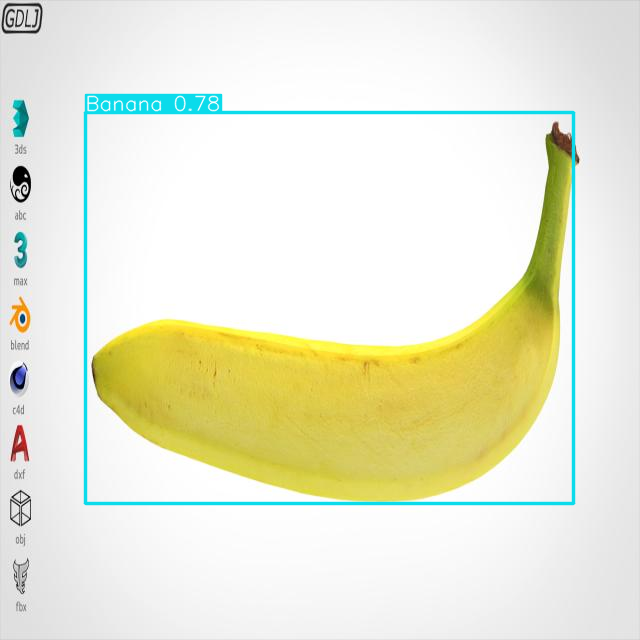

Saved 1 image to runs/detect/exp3


In [10]:
%cd /content/yolov5
import torch

# Load the model (if not already loaded)
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

# Run detection on the captured image
results = model('/content/test/images/01_png.rf.6868bd7aac84bb5faa8298613fc09a16.jpg')

# Show the detection result
results.show()
results.save()  # This saves to runs/detect/exp/ by default


In [13]:
!pip install torchcam --quiet


In [15]:
import torch

# pick CUDA if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

auto_model = torch.hub.load('ultralytics/yolov5','custom',
                            path='runs/train/exp/weights/best.pt',
                            force_reload=True).eval().to(device)
raw_model = auto_model.model       # this is a DetectionModel
layer_list = raw_model.model       # **this** is the ModuleList of layers

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-6-12 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [16]:
from torchcam.methods import SmoothGradCAMpp
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image
from torchvision.transforms import Resize
import torch.nn.functional as F
from torchvision.transforms import functional as TF  #correct to_tensor location

# FIX 1: Use the correct model variable and a better target layer
target_layer = model.model.model.model[-1]

YOLOv5 🚀 2025-6-12 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)



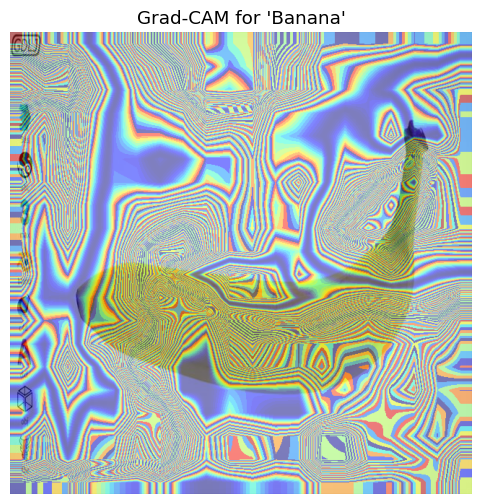

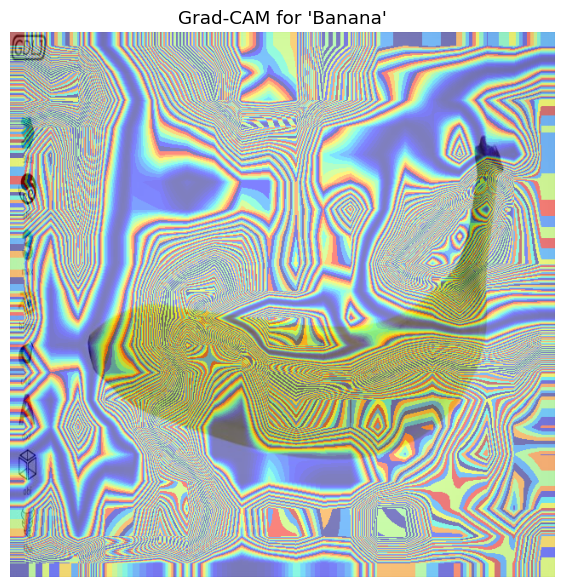

In [22]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from torchcam.utils import overlay_mask
import torch.nn.functional as F

# If you’re in a Jupyter/Colab notebook, ensures figures render inline:
%matplotlib inline

# 1) SETUP
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load your custom YOLOv5, disabling AutoShape so we keep pure PyTorch outputs
auto_model = torch.hub.load(
    'ultralytics/yolov5', 'custom',
    path='runs/train/exp/weights/best.pt',  # ← make sure this path is correct!
    autoshape=False, verbose=False
).to(device).eval()

# Pull out the DetectionModel and its Sequential layers
detect_model      = auto_model.model        # raw DetectionModel
backbone_and_head = detect_model.model      # nn.Sequential([...])

# 2) IMAGE PREPROCESSING
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114)):
    """Resize & pad keeping aspect ratio."""
    w, h      = img.size
    nw, nh    = new_shape
    scale     = min(nw / w, nh / h)
    rw, rh    = int(w * scale), int(h * scale)
    img_res   = img.resize((rw, rh), Image.BILINEAR)
    canvas    = Image.new('RGB', new_shape, color)
    paste_xy  = ((nw - rw) // 2, (nh - rh) // 2)
    canvas.paste(img_res, paste_xy)
    return canvas

# Load & prepare a test image
orig = Image.open('/content/test/images/01_png.rf.6868bd7aac84bb5faa8298613fc09a16.jpg').convert('RGB')
inp  = letterbox(orig, (640, 640))

# → to BGR, CHW, torch tensor, normalize, enable grads
arr      = np.array(inp)[:, :, ::-1].copy()  # RGB→BGR + copy to remove negative stride
arr      = arr.transpose(2, 0, 1)            # HWC→CHW
tensor   = torch.from_numpy(arr).float().unsqueeze(0).to(device) / 255.0
tensor.requires_grad_(True)

# 3) RUN A NO-GRAD PASS TO GET BOXES & PICK TOP DETECTION
with torch.no_grad():
    dets, _ = auto_model(tensor)   # [preds, augment_info]
dets       = dets[0]               # [N, 5+nc]
obj_conf   = dets[:, 4]
cls_conf, cls_id = dets[:, 5:].max(dim=1)
scores     = obj_conf * cls_conf
best_idx   = int(scores.argmax())
target_cls = int(cls_id[best_idx])

# 4) HOOK INTO A CONV LAYER FOR GRAD-CAM
# Here we hook layer 10 (the last 512→256 conv) – adjust index if you want another layer
target_layer = backbone_and_head[10]
activations = []
gradients   = []

def _fw(m, inp, out):
    activations.append(out)
def _bw(m, gin, gout):
    gradients.append(gout[0])

handle_fw = target_layer.register_forward_hook(_fw)
handle_bw = target_layer.register_full_backward_hook(_bw)

# 5) FORWARD + BACKWARD ON THE RAW DETECTIONMODEL
raw_out = detect_model(tensor)      # pure PyTorch → (preds, x)
preds   = raw_out[0]                # [1, N, 5+nc]

D       = preds.size(2)
flat    = preds.view(1, -1)         # [1, N*D]
cam_idx = best_idx * D + 5 + target_cls

flat[0, cam_idx].backward()         # backprop only that score

# 6) BUILD & NORMALIZE THE CAM MAP
act     = activations[0].detach()[0]  # [C, H, W]
grad    = gradients[0].detach()[0]    # [C, H, W]
weights = grad.mean(dim=(1, 2))        # [C]
cam     = (weights[:,None,None] * act).sum(dim=0)  # [H, W]
cam     = F.relu(cam)
cam    -= cam.min()
cam    /= cam.max() + 1e-8

# Upsample CAM to match the letterboxed input size
cam_up = F.interpolate(
    cam.unsqueeze(0).unsqueeze(0),
    size=inp.size[::-1],  # PIL size is (W,H)
    mode='bilinear', align_corners=False
)[0,0]

# 7) OVERLAY & DISPLAY
mask   = ToPILImage()(cam_up.cpu())               # CAM → PIL mask
result = overlay_mask(inp, mask, alpha=0.5)       # blend

plt.figure(figsize=(6,6))
plt.imshow(result)
plt.title(f"Grad-CAM for '{auto_model.names[target_cls]}'")
plt.axis('off')
plt.tight_layout()
plt.show()

# 8) CLEAN UP HOOKS
handle_fw.remove()
handle_bw.remove()
